# Parcial 2 - 2022 

In [1]:
from random import random
import numpy as np 
import time
import matplotlib.pyplot as plt
from scipy.stats import norm

## Ejercicio 1

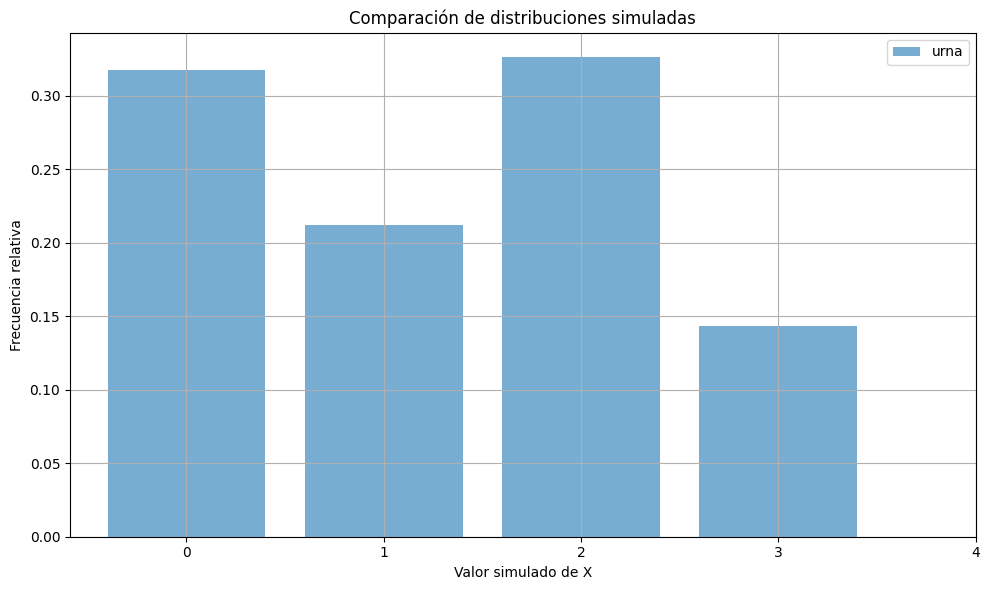

In [12]:
#c)

def generar_urna():
    a = []
    for i in range(100):
        if i < 32:
            a.append(0)
        elif i < 53:
            a.append(1)
        elif i < 86:
            a.append(2)
        else:
            a.append(3)
            
    return a

a = generar_urna()

def metodo_urna(a):
    I = int(random() * 100)
    return a[I]

import matplotlib.pyplot as plt
from collections import Counter

def plot_frecuencias(muestras, label):
    conteos = Counter(muestras)
    xs = sorted(conteos.keys())
    ys = [conteos[x] / len(muestras) for x in xs]
    plt.bar(xs, ys, alpha=0.6, label=label)

# Parámetro de simulación
n_sim = 10000

# Simulación con cada método
muestras = [metodo_urna(a) for _ in range(n_sim)]

# Plot
plt.figure(figsize=(10, 6))
plot_frecuencias(muestras, "urna")

plt.xticks(range(5))
plt.xlabel("Valor simulado de X")
plt.ylabel("Frecuencia relativa")
plt.title("Comparación de distribuciones simuladas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Ejercicio 2

In [13]:
# b)

def TIX():
    u = random()
    if u < 1/3:
        return np.log(3 * u)
    else:
        return -(np.log(3/2 * (1 - u)) / 2)

In [21]:
Nsim = 10000
total = 0
for _ in range(Nsim):
    if TIX() <= 1:
        total += 1

print("La probabilidad de que TIX sea menor o igual a 1 es:", total / Nsim)

La probabilidad de que TIX sea menor o igual a 1 es: 0.9075


## Ejercicio 3

In [86]:
def AyR():
    while True:
        y = np.random.uniform(-1, 1)
        u = random()
        if u < 1 - y ** 2:
            return y

In [87]:
Nsim = 10000
total = 0
for _ in range(Nsim):
    if AyR() > 0:
        total += 1

print(f"La probabilidad de que AyR sea menor o igual a 1 es: {total / Nsim}")

La probabilidad de que AyR sea menor o igual a 1 es: 0.4996


## Ejercicio 4

In [39]:
# a)

CARA = 0
CRUZ = 1

def dos_distintos(p=1/3):
    anterior = None
    if random() < p:
        anterior = CARA
    else:
        anterior = CRUZ
    tiradas = 1
    while True:
        tiradas += 1
        if random() < p:
            actual = CARA
        else:
            actual = CRUZ
        if anterior != actual:
            return tiradas
        anterior = actual
        

# Estimar P(X = 4)
Nsim = 10000000
conteo = sum(1 for _ in range(Nsim) if dos_distintos() == 4)

print(f"Estimación de P(X = 4): {conteo / Nsim:.4f}")

Estimación de P(X = 4): 0.1234


In [ ]:
#b)

def geom(p):
    u = random()
    return int(np.log(1 - u) / np.log(1 - p)) + 1

def AyR():
    while True:
        y = geom(1/3)
        if y < 2:
            continue # ignorar valores invalidos
        u = random()
        if u < 0.5 * (1 + 2**(2-y)):
            return y
        
# Estimar P(X = 4)
Nsim = 10000
conteo = sum(1 for _ in range(Nsim) if AyR() == 4)

print(f"Estimación de P(X = 4): {conteo / Nsim:.4f}")

Estimación de P(X = 4): 0.1262
